In [1]:
import simexpal
import yaml
import matplotlib.pyplot as plt

cfg = simexpal.config_for_dir()

results = []
for run in cfg.collect_successful_results():
    with run.open_output_file() as f:
        yml = yaml.load(f, Loader=yaml.SafeLoader)
    results.append(yml)

for r in sorted(results, key=lambda r: (r['threads'], r['algo'])):
    print('Algorithm {}, {} threads takes: {} ms (insert), {} ms (lookup)'.format(
          r['algo'], r['threads'], r['time_insert'], r['time_lookup']))

Algorithm concurrent-chaining, 1 threads takes: 22791 ms (insert), 19087 ms (lookup)
Algorithm locked-linear, 1 threads takes: 12974 ms (insert), 12889 ms (lookup)
Algorithm lockfree-linear, 1 threads takes: 10726 ms (insert), 7676 ms (lookup)
Algorithm concurrent-chaining, 2 threads takes: 14227 ms (insert), 9940 ms (lookup)
Algorithm locked-linear, 2 threads takes: 33658 ms (insert), 30454 ms (lookup)
Algorithm lockfree-linear, 2 threads takes: 5475 ms (insert), 3887 ms (lookup)
Algorithm concurrent-chaining, 4 threads takes: 12428 ms (insert), 8094 ms (lookup)
Algorithm locked-linear, 4 threads takes: 45042 ms (insert), 44773 ms (lookup)
Algorithm lockfree-linear, 4 threads takes: 4455 ms (insert), 2904 ms (lookup)
Algorithm concurrent-chaining, 8 threads takes: 7918 ms (insert), 4196 ms (lookup)
Algorithm locked-linear, 8 threads takes: 53930 ms (insert), 57910 ms (lookup)
Algorithm lockfree-linear, 8 threads takes: 1904 ms (insert), 1497 ms (lookup)
Algorithm concurrent-chaining, 

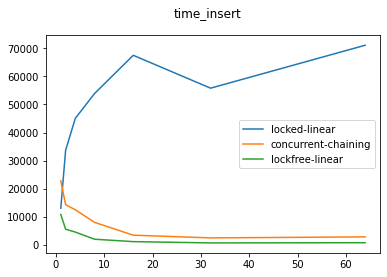

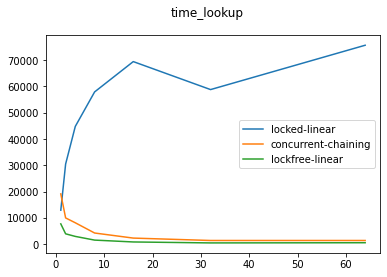

In [3]:
def extract_times(algo, key):
    res = []
    for r in sorted(results, key=lambda r: r['threads']):
        if r['algo'] != algo:
            continue
        res.append((r['threads'], r[key]))
    return res

def plot(key):
    plt.suptitle(key)
    for algo in ['locked-linear', 'concurrent-chaining', 'lockfree-linear']:
        times = extract_times(algo, key)
        plt.plot([t for t, _ in times], [time for _, time in times], label=algo)
    plt.legend()
    plt.savefig('plot_6_' + key + ".pdf")
    plt.show()

plot('time_insert')
plot('time_lookup')